In [36]:
import pandas as pd
import matplotlib.pyplot as plt
# import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,ConfusionMatrixDisplay

In [37]:
# pip intstall opendatasets

In [38]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [39]:
df["Gender"].replace({"Male":0,"Female":1},inplace=True)

C:\Users\shrey\AppData\Local\Temp\ipykernel_11332\323114350.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"Male":0,"Female":1},inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_11332\323114350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"].replac

In [40]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


In [41]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [42]:
x = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=29)

In [44]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [45]:
print("Training accuracy: ",model.score(x_train,y_train)*100)

Training accuracy:  62.66666666666667


In [46]:
y_pred = model.predict(x_test)

In [47]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [48]:
print("Testing Accuracy: ",model.score(x_test,y_test)*100)

Testing Accuracy:  69.0


normalize the data using min max normalization

In [49]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=df[['Age','EstimatedSalary']]
X_scaled=scaler.fit_transform(X)

In [50]:
 x_train,x_test,y_train,y_test=train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [51]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Training accuracy is:",model.score(x_train,y_train)*100)
print("Testing accuracy is:",model.score(x_test,y_test)*100)

Training accuracy is: 80.9375
Testing accuracy is: 87.5


In [52]:
# TP=value:True Model:True
# FP=value:False Model:True
# TN=value:True Model:false
# FN=value:False Model:false


In [53]:
cm = confusion_matrix(y_test,y_pred)#confusionMatrix
cm

array([[51,  1],
       [ 9, 19]], dtype=int64)

In [54]:
print(confusion_matrix.__doc__)# To read confusionMatrix documentation

Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_classes), default=None
        List of labels to index the matrix. This may be used to reorder
        or select a subset of labels.
        If ``None`` is given, those that appear at least once
        in ``y

In [55]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()

In [56]:
print(tn,fp,fn,tp)

51 1 9 19


In [57]:
a = accuracy_score(y_test,y_pred)
a

0.875

In [58]:
#Error Score
e = 1- a
e

0.125

In [59]:
precision_score(y_test,y_pred)

0.95

In [60]:
recall_score(y_test,y_pred)

0.6785714285714286

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        52
           1       0.95      0.68      0.79        28

    accuracy                           0.88        80
   macro avg       0.90      0.83      0.85        80
weighted avg       0.89      0.88      0.87        80



In [63]:
from sklearn.metrics import accuracy_score

print('\nAccuracy: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Error Rate: ',(fp+fn)/(tp+tn+fn+fp))
print('Sensitivity (Recall or True positive rate) :',tp/(tp+fn))
print('Specificity (True negative rate) :',tn/(fp+tn))
print('Precision (Positive predictive value) :',tp/(tp+fp))
print('False Positive Rate :',fp/(tn+fp))


Accuracy: 0.88
Error Rate:  0.125
Sensitivity (Recall or True positive rate) : 0.6785714285714286
Specificity (True negative rate) : 0.9807692307692307
Precision (Positive predictive value) : 0.95
False Positive Rate : 0.019230769230769232


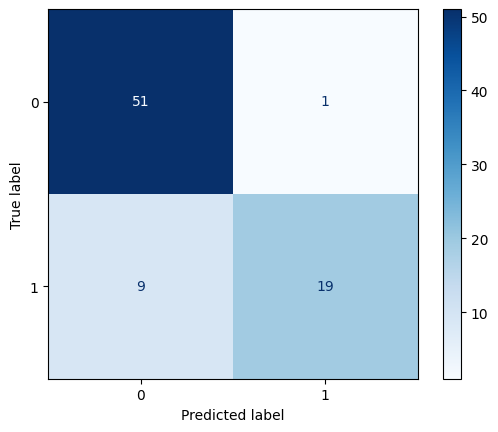

In [64]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
conf_matrix.plot(cmap=plt.cm.Blues)
plt.show()

In [35]:
sensitivity = tp / (tp + fn)
print('Sensitivity (Recall or True positive rate): {:.2f}'.format(sensitivity))


Sensitivity (Recall or True positive rate): 0.68
